In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import sys
sys.version

'3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]'

In [ ]:

def get_data(kaggle_API_key):
  !chmod 600 /content/kaggle(1).json
  os.environ['KAGGLE_CONFIG_DIR'] = '/content'
  !kaggle datasets download -d uciml/sms-spam-collection-dataset
  !unzip \*.zip && rm *.zip
  df = pd.read_csv('/content/spam.csv',encoding='latin1')
  return df
  #!pip install kaggle
  #!mkdir -p ~/.kaggle
  #!cp kaggle.json ~/.kaggle/


In [ ]:
df = get_data('/content/kaggle (1).json')
df.head()


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 /content/kaggle(1).json'
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 105MB/s]
Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample()

,v1,v2
2042,ham,"Me not waking up until 4 in the afternoon, sup"


In [ ]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
!pip install scikit-learn==1.3.2

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

The value count of one class is predominantly higher , so its means that the data is imbalanced.


In [ ]:
df.sample(5)

,label,text
1793,0,You bad girl. I can still remember them
2934,0,"Yeah, we got one lined up for us"
44,0,Great! I hope you like your man well endowed. ...
1469,0,7 wonders in My WORLD 7th You 6th Ur style 5th...
757,0,"Faith makes things possible,Hope makes things ..."


In [ ]:
df.shape

(5169, 2)

# ***EDA***

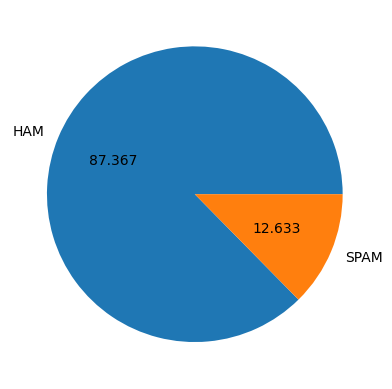

In [ ]:
plt.pie(df['label'].value_counts(),labels=['HAM','SPAM'],autopct='%.3f')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

<ipython-input-26-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [ ]:
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-28-308107bd3763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-29-b3857ac87c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.sample(5)

,label,text,num_characters,num_words,num_sent
1747,0,I think u have the wrong number.,32,8,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
1212,0,"Yo, the game almost over? Want to go to walmar...",52,13,2
161,0,New car and house for my parents.:)i have only...,64,19,2
1527,0,No screaming means shouting..,29,5,1


Now , we can analyse the number of words senetences and characters of spam and ham categories.

In [ ]:
#For Ham categories
df[df['label'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#For spam categories
df[df['label'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
#for all categories
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


after looking all these tables, we can assume that emails with more number of characters, sentences and words tends to be SPAM.

<Axes: xlabel='num_characters', ylabel='Count'>

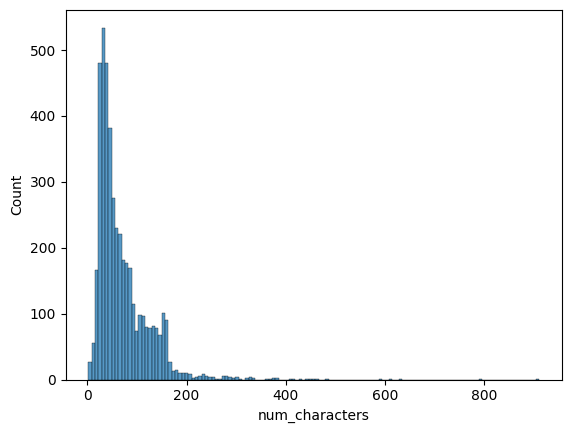

In [ ]:
sns.histplot(df[df['label'] == 0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

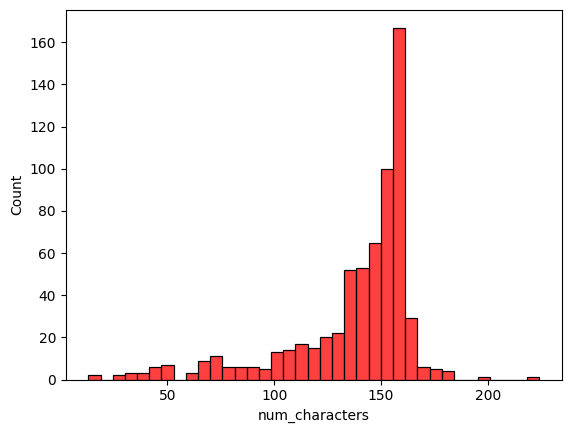

In [ ]:

sns.histplot(df[df['label'] == 1]['num_characters'],color='red')


In [ ]:
df[['label','num_characters','num_words','num_sent']].corr()

,label,num_characters,num_words,num_sent
label,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

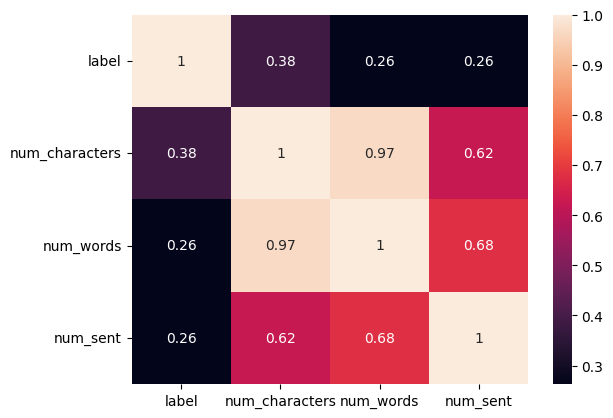

In [ ]:
sns.heatmap(df[['label','num_characters','num_words','num_sent']].corr(),annot=True)

# **Text** **Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['transform_text'] = df['text'].apply(transform_text)

<ipython-input-40-89d7d64e85b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df['text'].apply(transform_text)


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

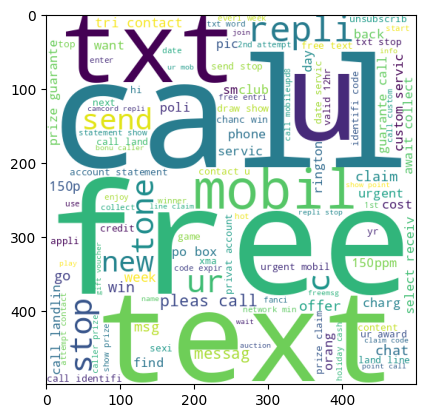

In [ ]:
spam_wc = wc.generate(df[df['label']==1]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

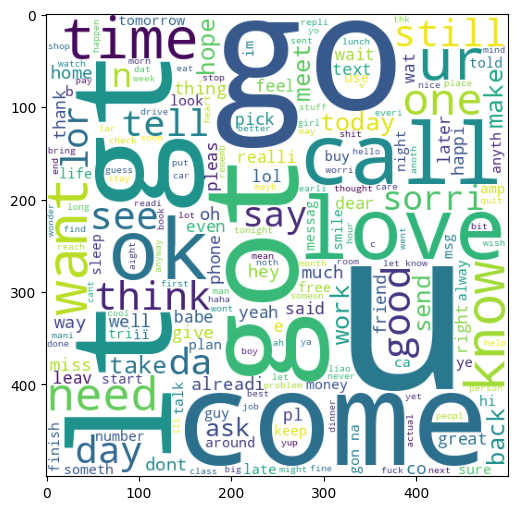

In [ ]:
ham_wc = wc.generate(df[df['label']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['label'] == 1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
ham_corpus = []
for msg in df[df['label'] == 0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
print(len(spam_corpus))
print(len(ham_corpus))

9939
35404


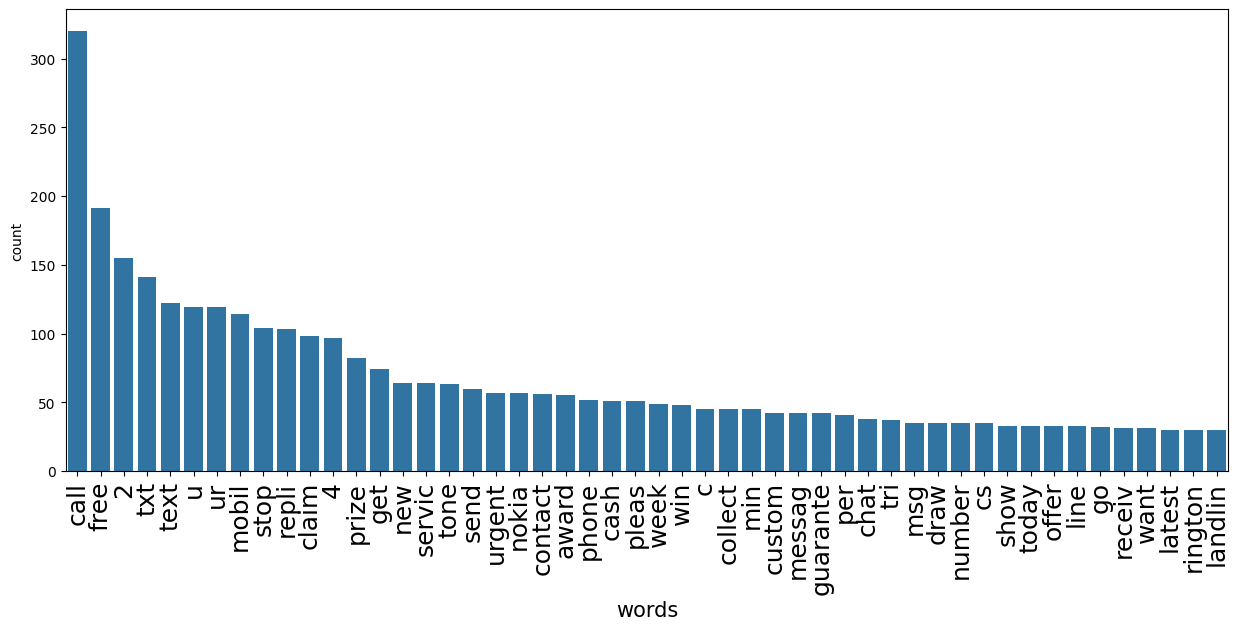

In [ ]:
from collections import Counter

df_most_common_spam = pd.DataFrame(Counter(spam_corpus).most_common(50),columns=['word','count'])
plt.figure(figsize=(15,6))
sns.barplot(data = df_most_common_spam , x='word',y='count')
plt.xticks(rotation='vertical',fontsize=18)
plt.xlabel('words',fontsize=15)
plt.show()

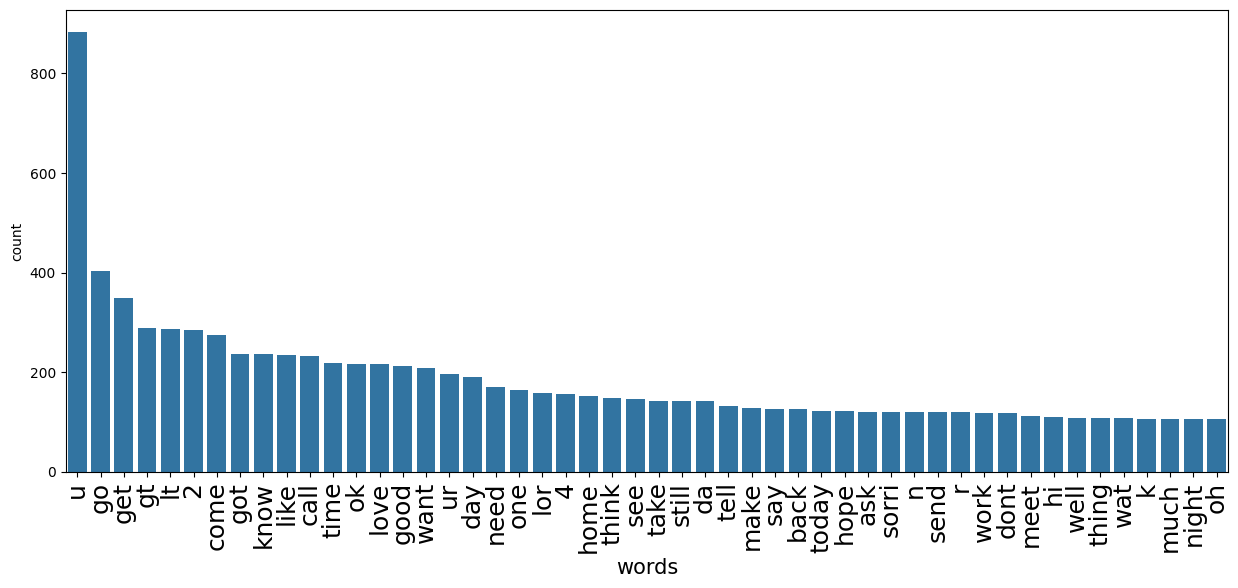

In [ ]:
from collections import Counter

df_most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(50),columns=['word','count'])
plt.figure(figsize=(15,6))
sns.barplot(data = df_most_common_ham , x='word',y='count')
plt.xticks(rotation='vertical',fontsize=18)
plt.xlabel('words',fontsize=15)
plt.show()

# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [ ]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.8626692456479691
[[769 126]
 [ 16 123]]
0.4939759036144578
0.6340206185567011


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.97678916827853
[[895   0]
 [ 24 115]]
1.0
0.905511811023622


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.9700193423597679
[[890   5]
 [ 26 113]]
0.9576271186440678
0.8793774319066149


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True,random_state = 42)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)

    return accuracy,precision,f1score

In [ ]:
accuracy_scores = []
precision_scores = []
f1_scores = []
for name,clf in clfs.items():

    current_accuracy,current_precision,current_f1score = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 Score - ",current_f1score)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1score)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.9824561403508771
F1 Score -  0.8853754940711464
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
F1 Score -  0.4640883977900553
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
F1 Score -  0.905511811023622
For  DT
Accuracy -  0.9197292069632496
Precision -  0.78
F1 Score -  0.6527196652719666
For  LR
Accuracy -  0.9468085106382979
Precision -  0.9468085106382979
F1 Score -  0.7639484978540773
For  RF
Accuracy -  0.960348162475822
Precision -  0.9711538461538461
F1 Score -  0.8312757201646092
For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.944954128440367
F1 Score -  0.8306451612903225
For  BgC
Accuracy -  0.9458413926499033
Precision -  0.8029197080291971
F1 Score -  0.7971014492753622
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9752066115702479
F1 Score -  0.9076923076923077
For  GBDT
Accuracy -  0.9400386847195358
Precision -  0.9425287356321839
F1 Score -  0.7256637168141594
For  xgb
Accuracy -  

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1-Scores':f1_scores}).sort_values('F1-Scores',ascending=False)


In [ ]:
performance_df


,Algorithm,Accuracy,Precision,F1-Scores
8,ETC,0.976789,0.975207,0.907692
2,NB,0.976789,1.000000,0.905512
0,SVC,0.971954,0.982456,0.885375
5,RF,0.960348,0.971154,0.831276
6,AdaBoost,0.959381,0.944954,0.830645
10,xgb,0.957447,0.927928,0.824000
7,BgC,0.945841,0.802920,0.797101
4,LR,0.946809,0.946809,0.763948
9,GBDT,0.940039,0.942529,0.725664
3,DT,0.919729,0.780000,0.652720


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.976789
1,NB,Accuracy,0.976789
2,SVC,Accuracy,0.971954
3,RF,Accuracy,0.960348
4,AdaBoost,Accuracy,0.959381
5,xgb,Accuracy,0.957447
6,BgC,Accuracy,0.945841
7,LR,Accuracy,0.946809
8,GBDT,Accuracy,0.940039
9,DT,Accuracy,0.919729


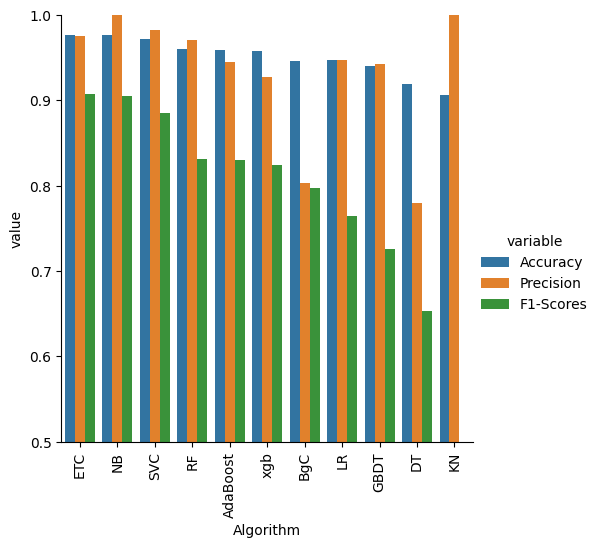

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**Our top performer model is NB ETC SVC by having both accuracy and precision above 94% and f1-score around 89%.**

In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('ETC',etc),('SVC',svc),('MNB',mnb)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('SVC',
                              SVC(gamma=1.0, kernel='sigmoid', probability=True,
                                  random_state=42)),
                             ('MNB', MultinomialNB())],
                 voting='soft')

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1-Score: ",f1_score(y_test,y_pred))

Accuracy:  0.9806576402321083
Precision:  1.0
F1-Score:  0.9224806201550387


In [ ]:
estimators=[('MNB', mnb), ('SVC', svc), ('ETC', etc)]
final_estimator=BaggingClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9402985074626866


In [ ]:
print("F1-Score: ",f1_score(y_test,y_pred))

F1-Score:  0.9230769230769231


**So we can see that maximum accuracy and precision is of voting classifier that we have built so we will only use this**

In [ ]:
import pickle
pickle.dump(tfidf,open('final_vectorizer_final_3.2.pkl','wb'))
#pickle.dump(etc,open('model_etc.pkl','wb'))
pickle.dump(voting,open('voting_classifier_final_3.2.pkl','wb'))


In [ ]:
pickle.dump(transform_text,open('preprocess_text_final_3.2.pkl','wb'))